# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Load The Datafile

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\housing.csv')

In [3]:
print("Sample of the dataset")
data.head()

Sample of the dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [5]:
print(data.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [6]:
print("Data has rows",data.shape[0],"and columns",data.shape[1])

Data has rows 20640 and columns 10


In [7]:
print("datatypes of columns of data")
print("\n")
print(data.dtypes)

datatypes of columns of data


longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


In [8]:
data.apply(lambda x: sum(x.isnull()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Exploratory Data Analysis

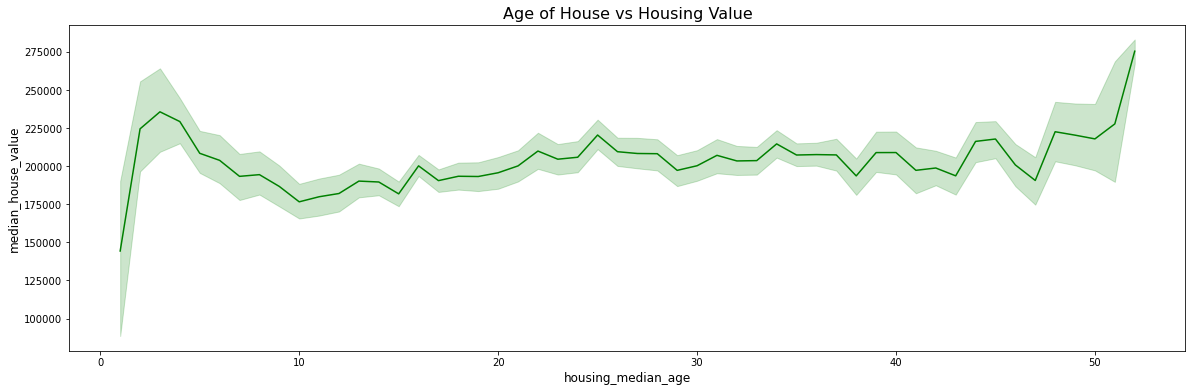

In [11]:
plt.figure(figsize=(20,6))
plt.title("Age of House vs Housing Value",fontsize = 16)
plt.xlabel("Age of House",fontsize=12)
plt.ylabel("Weighted Price",fontsize=12)
datax=sns.lineplot(x = data.housing_median_age, y=data.median_house_value, color = 'Green')
plt.show()

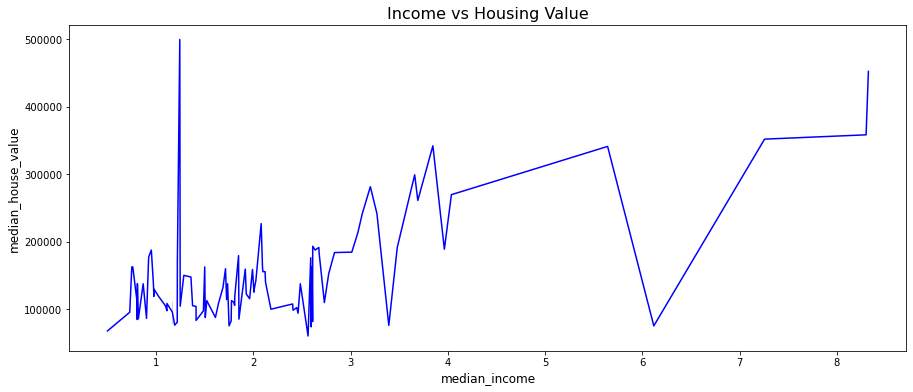

In [37]:
data_ = data.head(100)
plt.figure(figsize=(15,6))
plt.title("Income vs Housing Value",fontsize = 16)
plt.xlabel("Income",fontsize=12)
plt.ylabel("Weighted Price",fontsize=12)
datax=sns.lineplot(x = data_.median_income, y=data_.median_house_value, color = 'Blue')
plt.show()

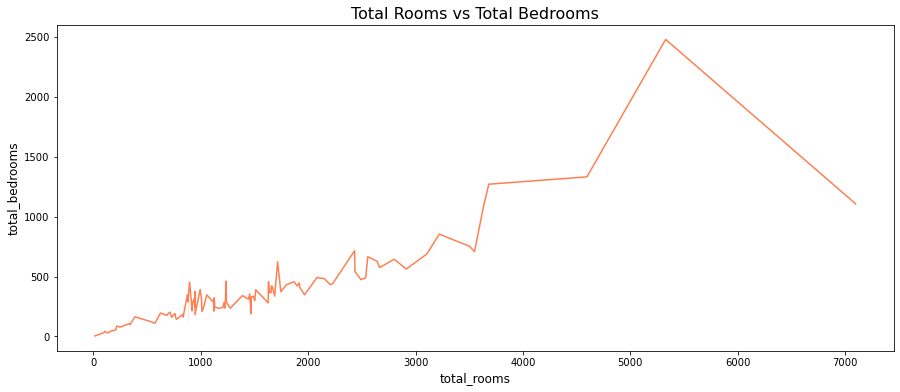

In [39]:
data_ = data.head(100)
plt.figure(figsize=(15,6))
plt.title("Total Rooms vs Total Bedrooms",fontsize = 16)
plt.xlabel("Total Rooms",fontsize=12)
plt.ylabel("Bedrooms",fontsize=12)
datax=sns.lineplot(x = data_.total_rooms, y=data_.total_bedrooms, color = 'coral')
plt.show()

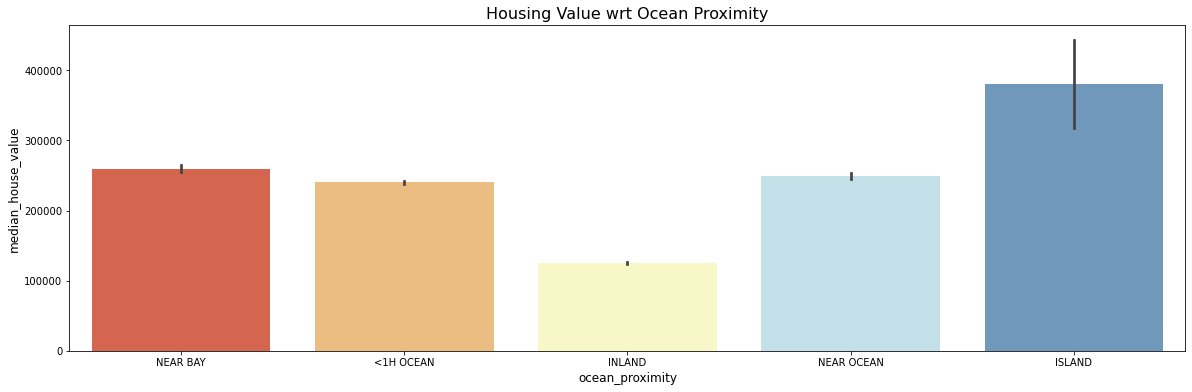

In [12]:
plt.figure(figsize=(20,6))
plt.title("Housing Value wrt Ocean Proximity",fontsize = 16)
plt.xlabel('Age of House',fontsize=12)
plt.ylabel('Ocean Proximity',fontsize=12)
ax = sns.barplot(x=data.ocean_proximity, y=data.median_house_value, palette = 'RdYlBu')
plt.show()

# Modelling

In [13]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data["ocean_proximity"]=LE.fit_transform(data["ocean_proximity"])

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [19]:
x = data[['longitude','latitude','median_income','households','population','ocean_proximity']].values
y = data['median_house_value'].values

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3,random_state = 100)

In [21]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)
score=lm.score(xtest,ytest)
print("Linear Regression Score:",score)

Linear Regression Score: 0.6380988029619253


In [22]:
x = data[['households','total_rooms','total_bedrooms','longitude','population','latitude','median_income','housing_median_age']].values
y = data['median_house_value'].values

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [24]:
poly = PolynomialFeatures(2)
xtrain = poly.fit_transform(xtrain)
xtest = poly.fit_transform(xtest)
lm.fit(xtrain,ytrain)
print(lm.score(xtrain, ytrain))

0.7010783483134382


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
x = data[['longitude','latitude','median_income','households','population']].values
y = data['median_house_value'].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [55]:
regressor = RandomForestRegressor(n_estimators = 100,random_state =0)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
print("Score:",regressor.score(xtest,ytest))

Score: 0.8337939056185496


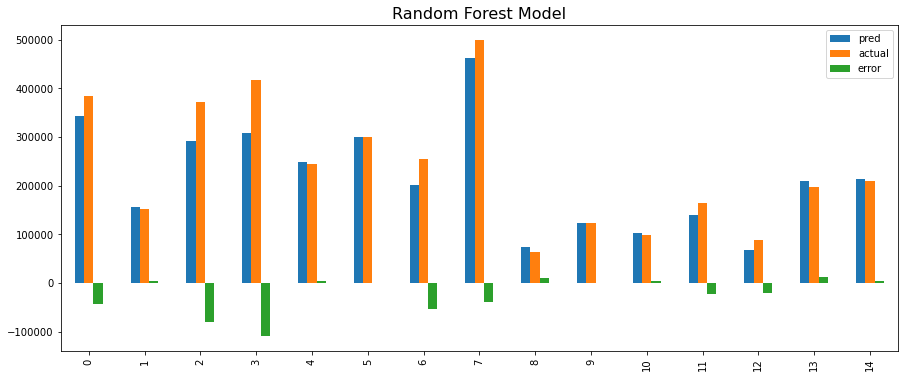

In [56]:
result = pd.DataFrame({'pred':ypred, 'actual':ytest})
result['error'] = result.pred - result.actual
result_= result.head(15)
result_.plot(kind='bar',figsize=(15,6))
plt.title("Random Forest Model",fontsize = 16)
plt.show()

Polynomial Regression Model Gives 70% accuracy and Linear Regression Model gives 64% accuracy whereas Random Forest gives 83% of accuracy